# Heart Disease Prediction - Final Project

## 1. Import libraries

In [45]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

## 2. Load data

In [ ]:
df = pd.read_csv("/content/cleveland.csv", header = None)
df.columns = ["age", "sex", "cp", "trestbps", "chol", "fbs", "restecg", "thalach", "exang", "oldpeak", "slope", "ca", "thal", "target"]
df["target"] = df.target.map ({0: 0, 1: 1, 2: 1, 3: 1, 4: 1})
df["thal"] = df.thal.fillna(df.thal.mean())
df["ca"] = df.ca.fillna(df.ca.mean())

## 3. Visualize the data

### Question 1: Use seaborn to visualize the relation between age and heart disease (target = 1 - is heart disease and 0 is normal)

In [23]:
def create_histograms(df):
    plt.figure(figsize = (7, 7.1))
    kernel_distibution_plot = sns.catplot(kind = "count", data = df, x = "age", hue = "target", fill = True,
                                                      palette = [sns.color_palette()[0], "orange"]).set(title = "Variation of Age for each target class")
    kernel_distibution_plot.ax.set_xticks(np.arange(0, 80, 5))
    plt.show(kernel_distibution_plot)

<Figure size 700x710 with 0 Axes>

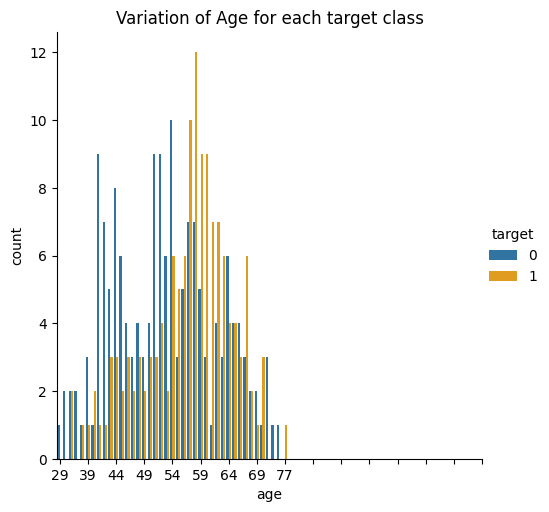

In [24]:
# Distribution of target vs age
create_histograms(df)

### Question 2:  Use seaborn to visualize the relation among age, sex and heart disease

In [37]:
def create_bar_histograms(df):
    plt.figure(figsize = (7, 7.1))
    kernel_distibution_plot = sns.catplot(kind = "bar", data = df, x = "sex", y = "age", hue = "target", fill = True,
                                                      palette = [sns.color_palette()[0], "orange"]).set(title = "Distribution of age vs sex with target class")
    plt.show(kernel_distibution_plot)

<Figure size 700x710 with 0 Axes>

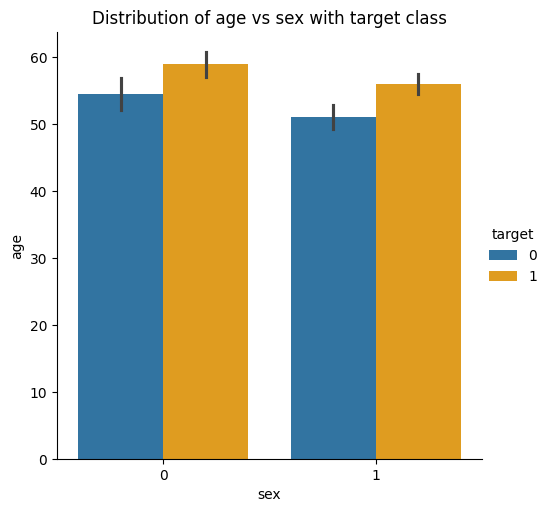

In [38]:
# Barplot of age, sex and heart disease
create_bar_histograms(df)

## 4. Split train, test dataset

In [41]:
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

## 5. Build model and evaluate the data

### Question 3: Use KNN for Heart Disease Prediction

In [49]:
from sklearn.neighbors import KNeighborsClassifier

knn_classifier = KNeighborsClassifier(n_neighbors = 5, weights = "uniform", algorithm = "auto", leaf_size = 30, p = 2, metric = "minkowski")
knn_classifier.fit(X_train, y_train)

y_train_pred = knn_classifier.predict(X_train)
y_pred = knn_classifier.predict(X_test)

# Use confusion matrix
cm_train = confusion_matrix(y_train_pred, y_train)
cm_test = confusion_matrix(y_pred, y_test)

In [50]:
print()
accuracy_for_train = np.round((cm_train[0][0] + cm_train[1][1]) / len(y_train), 2)
accuracy_for_test = np.round((cm_test[0][0] + cm_test[1][1]) / len(y_test), 2)
print("Accuracy for training set for KNeighborsClassifier = {}".format(accuracy_for_train))
print("Accuracy for test set for KNeighborsClassifier = {}".format(accuracy_for_test))


Accuracy for training set for KNeighborsClassifier = 0.76
Accuracy for test set for KNeighborsClassifier = 0.69


### Question 4: Use SVM for Heart Disease Prediction

In [51]:
from sklearn.svm import SVC

svm_classifier = SVC(kernel = "rbf", random_state = 42)
svm_classifier.fit(X_train, y_train)

y_train_pred = svm_classifier.predict(X_train)
y_pred = svm_classifier.predict(X_test)

# Use confusion matrix
cm_train = confusion_matrix(y_train_pred, y_train)
cm_test = confusion_matrix(y_pred, y_test)

In [52]:
print()
accuracy_for_train = np.round((cm_train[0][0] + cm_train[1][1]) / len(y_train), 2)
accuracy_for_test = np.round((cm_test[0][0] + cm_test[1][1]) / len(y_test), 2)
print("Accuracy for training set for SVM = {}".format(accuracy_for_train))
print("Accuracy for test set for SVM = {}".format(accuracy_for_test))


Accuracy for training set for SVM = 0.66
Accuracy for test set for SVM = 0.67


### Question 5: Use Naive Bayes for Heart Disease Prediction

In [54]:
from sklearn.naive_bayes import GaussianNB

nb_classifier = GaussianNB()
nb_classifier.fit(X_train, y_train)

y_train_pred = nb_classifier.predict(X_train)
y_pred = nb_classifier.predict(X_test)

# Use confusion matrix
cm_train = confusion_matrix(y_train_pred, y_train)
cm_test = confusion_matrix(y_pred, y_test)

In [55]:
print()
accuracy_for_train = np.round((cm_train[0][0] + cm_train[1][1]) / len(y_train), 2)
accuracy_for_test = np.round((cm_test[0][0] + cm_test[1][1]) / len(y_test), 2)
print("Accuracy for training set for Naive Bayes = {}".format(accuracy_for_train))
print("Accuracy for test set for Naive Bayes = {}".format(accuracy_for_test))


Accuracy for training set for Naive Bayes = 0.85
Accuracy for test set for Naive Bayes = 0.84


### Question 6: Use Decision Tree for Heart Disease Prediction

In [56]:
from sklearn.tree import DecisionTreeClassifier

dt_classifier = DecisionTreeClassifier(criterion = "gini", max_depth = 10, min_samples_split = 2)
dt_classifier.fit(X_train, y_train)

y_train_pred = dt_classifier.predict(X_train)
y_pred = dt_classifier.predict(X_test)

# Use confusion matrix
cm_train = confusion_matrix(y_train_pred, y_train)
cm_test = confusion_matrix(y_pred, y_test)

In [57]:
print()
accuracy_for_train = np.round((cm_train[0][0] + cm_train[1][1]) / len(y_train), 2)
accuracy_for_test = np.round((cm_test[0][0] + cm_test[1][1]) / len(y_test), 2)
print("Accuracy for training set for Decision Tree = {}".format(accuracy_for_train))
print("Accuracy for test set for Decision Tree = {}".format(accuracy_for_test))


Accuracy for training set for Decision Tree = 1.0
Accuracy for test set for Decision Tree = 0.75


### Question 7: Use Random Forest for Heart Disease Prediction

In [58]:
from sklearn.ensemble import RandomForestClassifier

rf_classifier = RandomForestClassifier(criterion = "gini", max_depth = 10, min_samples_split = 2, n_estimators = 10, random_state = 42)
rf_classifier.fit(X_train, y_train)

y_train_pred = rf_classifier.predict(X_train)
y_pred = rf_classifier.predict(X_test)

# Use confusion matrix
cm_train = confusion_matrix(y_train_pred, y_train)
cm_test = confusion_matrix(y_pred, y_test)

In [59]:
print()
accuracy_for_train = np.round((cm_train[0][0] + cm_train[1][1]) / len(y_train), 2)
accuracy_for_test = np.round((cm_test[0][0] + cm_test[1][1]) / len(y_test), 2)
print("Accuracy for training set for Random Forest = {}".format(accuracy_for_train))
print("Accuracy for test set for Random Forest = {}".format(accuracy_for_test))


Accuracy for training set for Random Forest = 0.98
Accuracy for test set for Random Forest = 0.8


### Question 8: Use AdaBoost for Heart Disease Prediction

In [65]:
from sklearn.ensemble import AdaBoostClassifier

ada_classifier = AdaBoostClassifier(n_estimators = 50, learning_rate = 1.0)
ada_classifier.fit(X_train, y_train)

y_train_pred = ada_classifier.predict(X_train)
y_pred = ada_classifier.predict(X_test)

# Use confusion matrix
cm_train = confusion_matrix(y_train_pred, y_train)
cm_test = confusion_matrix(y_pred, y_test)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


In [66]:
print()
accuracy_for_train = np.round((cm_train[0][0] + cm_train[1][1]) / len(y_train), 2)
accuracy_for_test = np.round((cm_test[0][0] + cm_test[1][1]) / len(y_test), 2)
print("Accuracy for training set for AdaBoost = {}".format(accuracy_for_train))
print("Accuracy for test set for AdaBoost = {}".format(accuracy_for_test))


Accuracy for training set for AdaBoost = 0.91
Accuracy for test set for AdaBoost = 0.84


### Question 9: Use GradientBoost for Heart Disease Prediction

In [68]:
from sklearn.ensemble import GradientBoostingClassifier

gd_classifier = GradientBoostingClassifier(learning_rate = 0.1, n_estimators = 100, subsample = 1.0, min_samples_split = 2, max_depth = 3, random_state = 42)
gd_classifier.fit(X_train, y_train)

y_train_pred = gd_classifier.predict(X_train)
y_pred = gd_classifier.predict(X_test)

# Use confusion matrix
cm_train = confusion_matrix(y_train_pred, y_train)
cm_test = confusion_matrix(y_pred, y_test)

In [69]:
print()
accuracy_for_train = np.round((cm_train[0][0] + cm_train[1][1]) / len(y_train), 2)
accuracy_for_test = np.round((cm_test[0][0] + cm_test[1][1]) / len(y_test), 2)
print("Accuracy for training set for GradientBoost = {}".format(accuracy_for_train))
print("Accuracy for test set for GradientBoost = {}".format(accuracy_for_test))


Accuracy for training set for GradientBoost = 1.0
Accuracy for test set for GradientBoost = 0.85


### Question 10: Use XGboost for Heart Disease Prediction

In [73]:
from xgboost import XGBClassifier

xgb_classifier = XGBClassifier(objective = "binary:logistic", random_state = 42, n_estimators = 100)
xgb_classifier.fit(X_train, y_train)

y_train_pred = xgb_classifier.predict(X_train)
y_pred = xgb_classifier.predict(X_test)

# Use confusion matrix
cm_train = confusion_matrix(y_train_pred, y_train)
cm_test = confusion_matrix(y_pred, y_test)

In [74]:
print()
accuracy_for_train = np.round((cm_train[0][0] + cm_train[1][1]) / len(y_train), 2)
accuracy_for_test = np.round((cm_test[0][0] + cm_test[1][1]) / len(y_test), 2)
print("Accuracy for training set for XGboost = {}".format(accuracy_for_train))
print("Accuracy for test set for XGboost = {}".format(accuracy_for_test))


Accuracy for training set for XGboost = 1.0
Accuracy for test set for XGboost = 0.87


### Question 11: Use Stacking for Heart Disease Prediction

In [78]:
from sklearn.ensemble import StackingClassifier

dtc = DecisionTreeClassifier(random_state = 42)
rfc = RandomForestClassifier(random_state = 42)
knn = KNeighborsClassifier()
gc = GradientBoostingClassifier ( random_state = 42)
ad = AdaBoostClassifier(random_state = 42)
svc = SVC(kernel = "rbf", random_state = 42)
xgb = XGBClassifier()

classifiers = [("dtc", dtc), ("rfc", rfc), ("knn", knn), ("gc", gc), ("ad", ad), ("svc", svc)]
stk_classifier = StackingClassifier(estimators = classifiers, final_estimator = xgb)
stk_classifier.fit(X_train, y_train)

y_train_pred = stk_classifier.predict(X_train)
y_pred = stk_classifier.predict(X_test)

# Use confusion matrix
cm_train = confusion_matrix(y_train_pred, y_train)
cm_test = confusion_matrix(y_pred, y_test)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.1

In [79]:
print()
accuracy_for_train = np.round((cm_train[0][0] + cm_train[1][1]) / len(y_train), 2)
accuracy_for_test = np.round((cm_test[0][0] + cm_test[1][1]) / len(y_test), 2)
print("Accuracy for training set for Stacking = {}".format(accuracy_for_train))
print("Accuracy for test set for Stacking = {}".format(accuracy_for_test))


Accuracy for training set for Stacking = 0.92
Accuracy for test set for Stacking = 0.9
